In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:/Users/Dell Inspiron/Desktop/ml tutorial/FyntraCustomerData.csv")

In [3]:
df.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg_Session_Length      500 non-null float64
Time_on_App             500 non-null float64
Time_on_Website         500 non-null float64
Length_of_Membership    500 non-null float64
Yearly_Amount_Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.describe()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

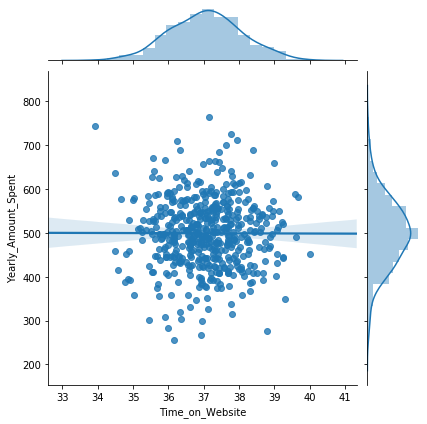

In [14]:
sns.jointplot(x='Time_on_Website', y='Yearly_Amount_Spent', data=df, kind='reg')
plt.show()

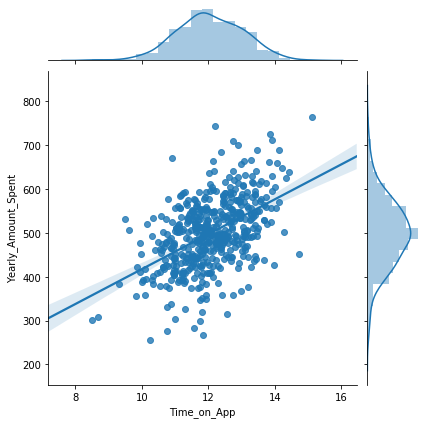

In [15]:
sns.jointplot(x='Time_on_App', y='Yearly_Amount_Spent', data=df, kind='reg')
plt.show()

# Time on APP is more correlated to Yearly amount spent

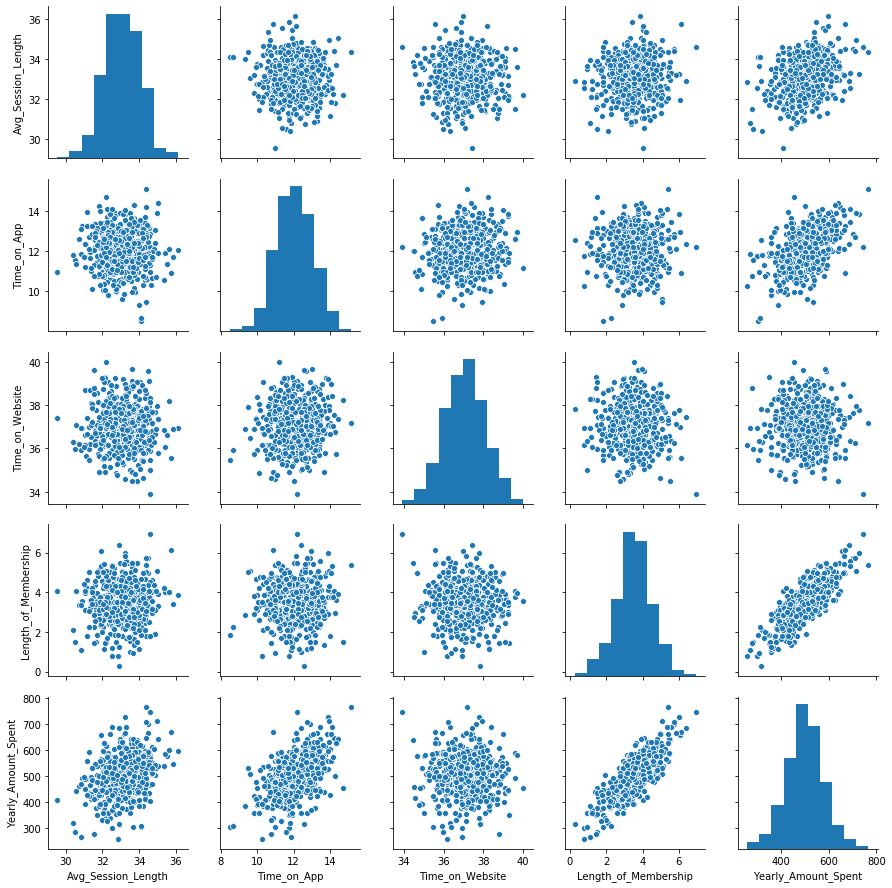

In [17]:
sns.pairplot(df)
# Most correlated  feature to 'Yearly amount spent' is 'Length of Membership'
# Second most correlated feature to 'Yearly amount spent' is 'Time on APP'

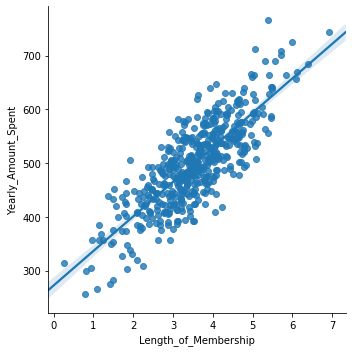

In [19]:
sns.lmplot(x='Length_of_Membership', y='Yearly_Amount_Spent',data=df)
plt.show()
#yes it fits in linear model

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = pd.DataFrame(df.iloc[:,3:7].values)
y = pd.DataFrame(df.iloc[:,7].values)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=85)

reg = LinearRegression()
model = reg.fit(x_train, y_train)


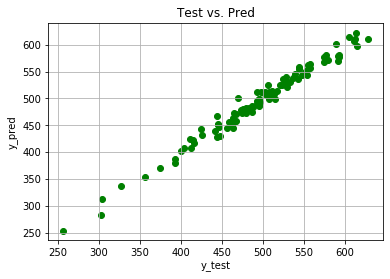

In [23]:
y_pred = reg.predict(x_test)
plt.scatter(y_test, y_pred, color='green')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Test vs. Pred')
plt.grid(True)
plt.show()

In [26]:
#What is the value of Root Mean Squared Error?
from sklearn import metrics
import numpy as np
RMSE = round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),2)
RMSE

9.75

In [29]:
#Based on coefficients interpret company should focus more on their mobile app or on their website

col_coef = pd.DataFrame(reg.coef_)
n=0
print ("Coefficients based on features are as follows:\n")
for i in range(3,7):
    print (df.columns[i], ': ', col_coef.iloc[0,n])
    n += 1

Coefficients based on features are as follows:

Avg_Session_Length :  25.947251632538507
Time_on_App :  39.06682064481031
Time_on_Website :  0.6825300909027122
Length_of_Membership :  61.334694182119904


In [30]:
#Based on coefficients company should more focus on Mobile app because feature 'Time on App' has more coefficient value